In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

In [2]:
!apt-get update 
!apt-get install g++ openjdk-8-jdk python-dev python3-dev 
!pip3 install JPype1-py3 
!pip3 install konlpy 
!JAVA_HOME="C:\Program Files\Java\jdk-13.0.2"

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-driver

In [24]:
# 한글 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

%matplotlib inline

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 54 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existen

In [4]:
import nltk
import gensim
from gensim.models import word2vec


In [5]:
from konlpy.tag import Komoran
kor = Komoran()

In [6]:
from wordcloud import WordCloud

In [7]:
# 글자 폰트
path='/user/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

In [8]:
import re

def text_clean(doc):
    doc=re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣  ]'," ",doc)
    return doc

In [9]:
# 불용어 제거

ss= pd.read_csv('drive/MyDrive/Colab Notebooks/text_minning/stopwords-ko1.txt')
sw = [ s[0] for s in ss.values]

In [10]:
df_2018 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/text_minning/project/news_data_2018.csv', index_col=0)
df_2018=df_2018.reset_index(drop=False, inplace=False)
df_2018=df_2018.drop(['level_0','index'], axis=1)

date_1=df_2018[df_2018['date'].str.contains('2018.01')]
date_2=df_2018[df_2018['date'].str.contains('2018.02')]
date_3=df_2018[df_2018['date'].str.contains('2018.03')]
date_4=df_2018[df_2018['date'].str.contains('2018.04')]
date_5=df_2018[df_2018['date'].str.contains('2018.05')]
date_6=df_2018[df_2018['date'].str.contains('2018.06')]
date_7=df_2018[df_2018['date'].str.contains('2018.07')]
date_8=df_2018[df_2018['date'].str.contains('2018.08')]
date_9=df_2018[df_2018['date'].str.contains('2018.09')]
date_10=df_2018[df_2018['date'].str.contains('2018.10')]
date_11=df_2018[df_2018['date'].str.contains('2018.11')]
date_12=df_2018[df_2018['date'].str.contains('2018.12')]

In [ ]:
contents=[]

count=0

for i, j in enumerate(date_1['contents']):
  data=text_clean(j)
  kor_no= kor.nouns(data)
  clean_text=[token for token in kor_no if token not in sw]
  ko= nltk.Text(clean_text)
  most=ko.vocab().most_common(10)
  contents.append(most)
  count+=1
  print(i, end=' ')

contents


In [11]:
contents=[]

count=0

for i, j in enumerate(date_1['contents']):
  data=text_clean(j)
  kor_no= kor.nouns(data)
  clean_text=[token for token in kor_no if token not in sw]

  contents.append(clean_text)
  count+=1
  print(count, end=' ')


1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

In [122]:
len(date_1['contents'])

576

In [166]:
most[0][0]

'모빌리티'

In [53]:
contents

[['우리나라',
  '세계',
  '최초',
  '상용',
  '주파수',
  '경매',
  '사실',
  '정부',
  '하반기',
  '주파수',
  '경매',
  '계획',
  '사업자',
  '상용',
  '주무',
  '부처',
  '과학기술',
  '정보',
  '통신부',
  '조기',
  '상용',
  '주파수',
  '경매',
  '예정',
  '의견서',
  '제출',
  '과기',
  '정통부',
  '의견',
  '주파수',
  '경매',
  '경매',
  '시기',
  '주파수',
  '할당',
  '생각',
  '정부',
  '이통',
  '이통',
  '최대한',
  '주파수',
  '경매',
  '주장',
  '용',
  '주파수',
  '저주',
  '정부',
  '경매',
  '확정',
  '반면',
  '이통',
  '초고',
  '주파',
  '최소',
  '경매',
  '희망',
  '이통',
  '경쟁',
  '최소',
  '화해',
  '주파수',
  '확보',
  '정부',
  '국가',
  '공공재',
  '주파수',
  '전파',
  '법',
  '경매',
  '진행',
  '할당',
  '생각',
  '경쟁',
  '입찰',
  '진행',
  '경매',
  '본질',
  '경쟁',
  '최소',
  '이통',
  '주장',
  '반박',
  '상반기',
  '경매',
  '주파수',
  '매물',
  '낙찰',
  '주파수',
  '최소',
  '입찰',
  '가격',
  '이통',
  '때문',
  '부분',
  '염려',
  '주파수',
  '매물',
  '수요와 공급',
  '원칙',
  '이통',
  '가격',
  '주파수',
  '때문',
  '방지',
  '픽사',
  '베이',
  '과기',
  '정통부',
  '이동',
  '통신',
  '표준화',
  '기술',
  '협력',
  '기구',
  '용',
  '초고',
  '주파',
  '주파수',
  '단위',
  '블럭',
  '최대',
  '

In [12]:
import mlxtend

In [13]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [14]:
from mlxtend.frequent_patterns import association_rules

In [42]:
te = TransactionEncoder()
te_result = te.fit(contents).transform(contents)

In [ ]:
te.columns_

In [51]:
df=pd.DataFrame(te_result, columns=te.columns_)

In [44]:
df

,가가,가게,가격,가계,가공,가공식품,가구,가까이,가능,가닥,가담,가동,가드,가드레일,가든,가락,가로,가로등,가로수길,가맹,가맹점,가방,가사,가상,가상 공간,가상 머신,가상 키보드,가상공간,가상현실,가상화,가세,가속,가속도,가솔린,가수,가스,가슴,가시,가야,가양동,...,후자,후지쯔,후진,후회,훈,훈장,훼방,훼손,휘발,휠,휠체어,휴가,휴대,휴대 전화,휴대폰,휴렛팩커드,휴일,흉악범,흐름,흑,흑기사,흑백,흑자,흙,흡수,흥미,흥행,희망,희망자,히스토리,히어로,히어로즈,히타치,히트,힌트,힐,힐링,힐스,힐스테이트,힐튼
0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
572,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [52]:
# 지지도가 0.01이상인 항목집합만 
itemset = apriori(df, min_support=0.06, use_colnames=True)
itemset['length']= itemset['itemsets'].apply(lambda x: len(x))

df=itemset[(itemset['length']==2)&(itemset['support']>=0.01)].sort_values(by='support', ascending=False)

In [46]:
df.head(10)

,support,itemsets,length
861,0.190972,"(기술, 기반)",2
445,0.189236,"(기술, 개발)",2
550,0.182292,"(계획, 기술)",2
583,0.178819,"(계획, 예정)",2
741,0.178819,"(국내, 시장)",2
810,0.173611,"(글로벌, 시장)",2
941,0.171875,"(세계, 기술)",2
953,0.166667,"(기술, 예정)",2
948,0.163194,"(기술, 시장)",2
579,0.159722,"(계획, 시장)",2


In [ ]:
# itemset = apriori(df, min_support=0.1, use_colnames=True)
# itemset

In [24]:
association_rules(itemset, metric="confidence", min_threshold=0.1) 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(가상),(가격),0.154514,0.197917,0.078125,0.505618,2.554701,0.047544,1.622396
1,(가격),(가상),0.197917,0.154514,0.078125,0.394737,2.554701,0.047544,1.396890
2,(가격),(거래),0.197917,0.164931,0.083333,0.421053,2.552909,0.050691,1.442393
3,(거래),(가격),0.164931,0.197917,0.083333,0.505263,2.552909,0.050691,1.621232
4,(거래소),(가격),0.109375,0.197917,0.060764,0.555556,2.807018,0.039117,1.804688
...,...,...,...,...,...,...,...,...,...
9901,(정통부),"(과학기술, 통신부, 과기, 정부, 정보)",0.083333,0.062500,0.060764,0.729167,11.666667,0.055556,3.461538
9902,(통신부),"(과학기술, 정통부, 과기, 정부, 정보)",0.121528,0.060764,0.060764,0.500000,8.228571,0.053379,1.878472
9903,(과기),"(과학기술, 정통부, 통신부, 정부, 정보)",0.086806,0.060764,0.060764,0.700000,11.520000,0.055489,3.130787
9904,(정부),"(과학기술, 정통부, 통신부, 과기, 정보)",0.237847,0.079861,0.060764,0.255474,3.198984,0.041769,1.235873


In [25]:
association_rules(itemset, metric="confidence", min_threshold=0.1) 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(가상),(가격),0.154514,0.197917,0.078125,0.505618,2.554701,0.047544,1.622396
1,(가격),(가상),0.197917,0.154514,0.078125,0.394737,2.554701,0.047544,1.396890
2,(가격),(거래),0.197917,0.164931,0.083333,0.421053,2.552909,0.050691,1.442393
3,(거래),(가격),0.164931,0.197917,0.083333,0.505263,2.552909,0.050691,1.621232
4,(거래소),(가격),0.109375,0.197917,0.060764,0.555556,2.807018,0.039117,1.804688
...,...,...,...,...,...,...,...,...,...
9901,(정통부),"(과학기술, 통신부, 과기, 정부, 정보)",0.083333,0.062500,0.060764,0.729167,11.666667,0.055556,3.461538
9902,(통신부),"(과학기술, 정통부, 과기, 정부, 정보)",0.121528,0.060764,0.060764,0.500000,8.228571,0.053379,1.878472
9903,(과기),"(과학기술, 정통부, 통신부, 정부, 정보)",0.086806,0.060764,0.060764,0.700000,11.520000,0.055489,3.130787
9904,(정부),"(과학기술, 정통부, 통신부, 과기, 정보)",0.237847,0.079861,0.060764,0.255474,3.198984,0.041769,1.235873


In [19]:
import re
import networkx as nx

In [49]:
# 그래프
G = nx.Graph()
ar=(df['itemsets'])
G.add_edges_from(ar)

ValueError: ignored

In [47]:
# 페이지 랭크
pr= nx.pagerank(G)
nsize= np.array([v for v in pr.values()])
nsize=2000*(nsize-min(nsize))/(max(nsize)-min(nsize))

In [39]:
# 레이아웃
# pos= nx.spring_layout(G)
# pos= nx.shell_layout(G)
# pos= nx.spectral_layout(G)
# pos= nx.fruchterman_reingold_layout(G)
pos= nx.kamada_kawai_layout(G)
# pos= nx.random_layout(G)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49696 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text

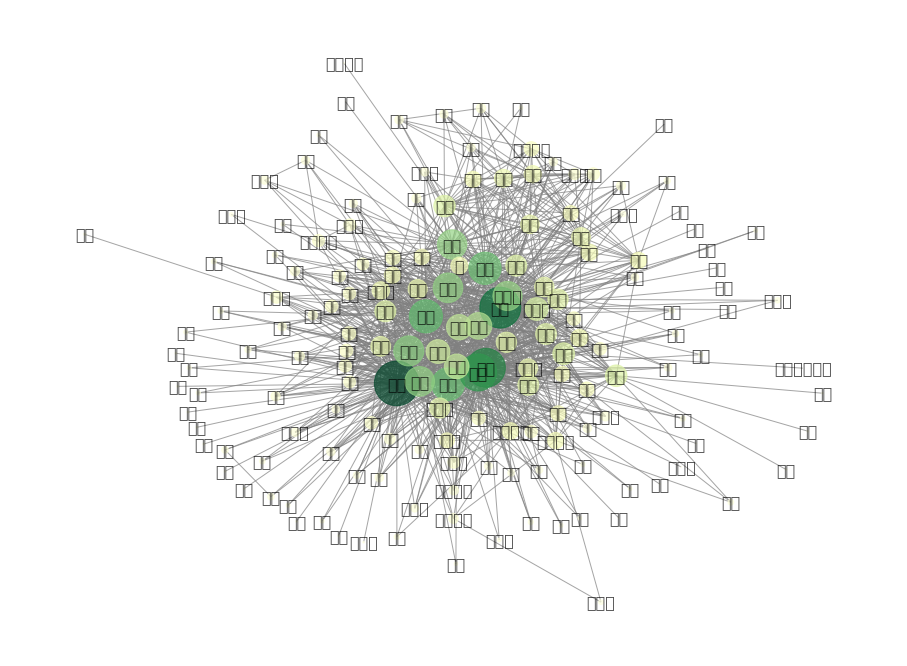

In [40]:
# 그래프
plt.figure(figsize=(16,12))
plt.axis('off')

nx.draw_networkx(G,font_size=16,
                pos=pos, node_color=list(pr.values()),node_size=nsize,
                alpha=0.7,edge_color='.5', cmap=plt.cm.YlGn)